<a href="https://colab.research.google.com/github/paulaRMachado/PUC-RIO-DTSC-MVP2/blob/main/PUC_MVP_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MVP Análise de Dados e Boas Práticas**

**Nome**: Paula R A Machado

**Matrícula**: 405205000163

**Dataset**: Indian Liver Patient Records

# Descrição do Problema

O conjunto de dados *Indian Liver Patient Records* contém informações de pacientes do nordeste de Andhra Pradesh, na Índia, com o objetivo principal de prever a presença ou ausência de doenças hepáticas. Para isso, o dataset reúne medidas bioquímicas como níveis enzimáticos (ALT, AST), bilirrubina, proteínas totais, albumina, além de dados demográficos como idade e sexo. O objetivo deste projeto é desenvolver uma base de dados limpa e preparada para fins de modelagem preditiva, com foco na detecção de doença hepática.

## Hipóteses do Problema

As hipóteses que tracei são as seguintes:

* Pacientes com níveis elevados de bilirrubina e enzimas hepáticas (AST, ALT) têm maior probabilidade de apresentar doença hepática.

* Existe relação entre o nível de albumina e a presença da doença hepática?

* Pacientes mais velhos tendem a apresentar um risco maior para o desenvolvimento de doença hepática?

* Medidas como a proporção entre albumina e globulina são bons indicadores para diferenciar pacientes saudáveis de doentes?

## Tipo de Problema

Este é um problema de **classificação supervisionada**.

Dado um conjunto de características laboratoriais e demográficas (como níveis de bilirrubina, enzimas hepáticas, proteínas, idade e sexo), o objetivo é prever se um paciente possui doença hepática ou não. O resultado desejado é classificar cada paciente em uma das duas classes: doente ou saudável.

## Seleção de Dados

O dataset *Indian Liver Patient Records* foi obtido do repositório Kaggle e contém informações laboratoriais e demográficas de pacientes com e sem doenças hepáticas. Por se tratar de um dataset real e não-curado, foi necessário carregar o arquivo CSV bruto e inspecionar a estrutura para verificar a qualidade dos dados antes da análise. Nessa etapa inicial, todos os atributos serão utilizados, pois são potencialmente relevantes para o problema e não há necessidade de filtragem prévia de colunas.

## Atributos do Dataset

O dataset *Indian Liver Patient Records* contém 583 amostras, sendo 416 de pacientes COM doença hepática e 167 de pacientes SEM doença hepática. Há 11 atributos:

- **Age**: Idade do paciente
- **Gender**: Sexo do Paciente
- **Total Bilirubin**: Bilirrubina Total (mg/dL)
- **Direct Bilirubin**: Bilirrubina Conjugada (mg/dL)
- **Alkaline Phosphotase**: Fosfatase Alcalina (UI/L)
- **Alamine Aminotransferase**: Alanina Aminotransferase (UI/L)
- **Aspartate Aminotransferase**: Aspartato Aminotransferase (UI/L)
- **Total Protiens**: Proteínas Totais (g/dL)
- **Albumin**: Albumina (g/dL)
- **Albumin and Globulin Ratio**: Razão Albumina/Globulina (%)
- **Dataset**: Estado hepático (com doença hepática ou saudável)

| Nome da Coluna               | Descrição                                 | Tipo       | Unidade/Observações                      |
| ---------------------------- | ----------------------------------------- | ---------- | ---------------------------------------- |
| `Age`                        | Idade do paciente                         | Numérica   | Anos                                     |
| `Gender`                     | Sexo do paciente                          | Categórica | "Male" (masculino), "Female" (feminino)  |
| `Total_Bilirubin`            | Bilirrubina total no sangue               | Numérica   | mg/dL                                    |
| `Direct_Bilirubin`           | Bilirrubina conjugada (direta)            | Numérica   | mg/dL                                    |
| `Alkaline_Phosphotase`       | Nível de fosfatase alcalina               | Numérica   | UI/L (Unidades Internacionais por Litro) |
| `Alamine_Aminotransferase`   | Nível de alanina aminotransferase (ALT)   | Numérica   | UI/L                                     |
| `Aspartate_Aminotransferase` | Nível de aspartato aminotransferase (AST) | Numérica   | UI/L                                     |
| `Total_Protiens`             | Quantidade total de proteínas no sangue   | Numérica   | g/dL                                     |
| `Albumin`                    | Nível de albumina no sangue               | Numérica   | g/dL                                     |
| `Albumin_and_Globulin_Ratio` | Razão entre albumina e globulina          | Numérica   | Percentual (%)                           |
| `Dataset`                    | Indica o estado hepático do paciente      | Numérica | 1 = Doente, 2 = Saudável                 |


##Bibliotecas necessárias e carga de dados

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statistics
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

In [39]:
# Camada Bronze – Dados Brutos carregados diretamente do repositório
url = "https://raw.githubusercontent.com/paulaRMachado/PUC-RIO-DTSC-MVP2/refs/heads/main/indian_liver_patient.csv"
bronze = pd.read_csv(url)

In [40]:
# visualização das primeiras linhas
bronze.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


#Análise de Dados

##Total e Tipo das Instâncias

In [41]:
# Informações sobre a estrutura do dataset
bronze.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


O dataset contém 583 amostras e 11 atributos, sendo 10 numéricos e apenas um categórico (Gender). Todos os campos estão completos, exceto Albumin_and_Globulin_Ratio, que tem 4 valores ausentes. O alvo (Dataset) está codificado numericamente e o consumo de memória é baixo (~50 KB), facilitando o processamento.

In [42]:
# Alteração dos nomes das variáveis
novos_nomes = {
    'Age': 'Idade',
    'Gender': 'Sexo',
    'Total_Bilirubin': 'Bilirrubina Total (mg/dL)',
    'Direct_Bilirubin': 'Bilirrubina Conjugada (mg/dL)',
    'Alkaline_Phosphotase': 'Fosfatase Alcalina (UI/L)',
    'Alamine_Aminotransferase': 'Alanina Aminotransferase (UI/L)',
    'Aspartate_Aminotransferase': 'Aspartato Aminotransferase (UI/L)',
    'Total_Protiens': 'Proteínas Totais (g/dL)',
    'Albumin': 'Albumina (g/dL)',
    'Albumin_and_Globulin_Ratio': 'Razão Albumina/Globulina (%)',
    'Dataset': 'Estado hepático'
}

bronze = bronze.rename(columns=novos_nomes)
bronze.head()

,Idade,Sexo,Bilirrubina Total (mg/dL),Bilirrubina Conjugada (mg/dL),Fosfatase Alcalina (UI/L),Alanina Aminotransferase (UI/L),Aspartato Aminotransferase (UI/L),Proteínas Totais (g/dL),Albumina (g/dL),Razão Albumina/Globulina (%),Estado hepático
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [43]:
print(f'Moda de Idade: {statistics.mode(bronze["Idade"])}')
print(f'Moda de Sexo: {statistics.mode(bronze["Sexo"])}')
print(f'Moda de Bilirrubina Total: {statistics.mode(bronze["Bilirrubina Total (mg/dL)"])}')
print(f'Moda de Bilirrubina Conjugada: {statistics.mode(bronze["Bilirrubina Conjugada (mg/dL)"])}')
print(f'Moda de Fosfatase Alcalina: {statistics.mode(bronze["Fosfatase Alcalina (UI/L)"])}')
print(f'Moda de Alanina Aminotransferase: {statistics.mode(bronze["Alanina Aminotransferase (UI/L)"])}')
print(f'Moda de Aspartato Aminotransferase: {statistics.mode(bronze["Aspartato Aminotransferase (UI/L)"])}')
print(f'Moda de Proteínas Totais: {statistics.mode(bronze["Proteínas Totais (g/dL)"])}')
print(f'Moda de Albumina: {statistics.mode(bronze["Albumina (g/dL)"])}')
print(f'Moda de Razão Albumina/Globulina: {statistics.mode(bronze["Razão Albumina/Globulina (%)"])}')
print(f'Moda de Estado Hepático: {statistics.mode(bronze["Estado hepático"])}')

Moda de Idade: 60
Moda de Sexo: Male
Moda de Bilirrubina Total: 0.8
Moda de Bilirrubina Conjugada: 0.2
Moda de Fosfatase Alcalina: 198
Moda de Alanina Aminotransferase: 25
Moda de Aspartato Aminotransferase: 23
Moda de Proteínas Totais: 7.0
Moda de Albumina: 3.0
Moda de Razão Albumina/Globulina: 1.0
Moda de Estado Hepático: 1


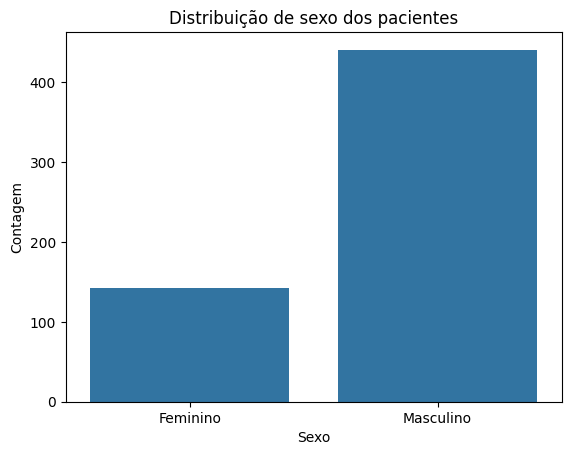

In [44]:
"""
Distribuição de pacientes quanto ao sexo
Utilizei o método map para facilitar o entendimento do gráfico uma vez que o atributo está em inglês.
"""
sns.countplot(x=bronze['Sexo'].map({'Male': 'Masculino', 'Female': 'Feminino'}))
plt.title('Distribuição de sexo dos pacientes')
plt.xlabel('Sexo')
plt.ylabel('Contagem')
plt.show()



O gráfico de barras mostra a distribuição dos pacientes de acordo com o sexo. Observa-se um claro desbalanceamento entre os gêneros, com predominância de pacientes do sexo masculino em relação ao feminino.

Essa diferença pode refletir características da amostra ou um viés na coleta dos dados.

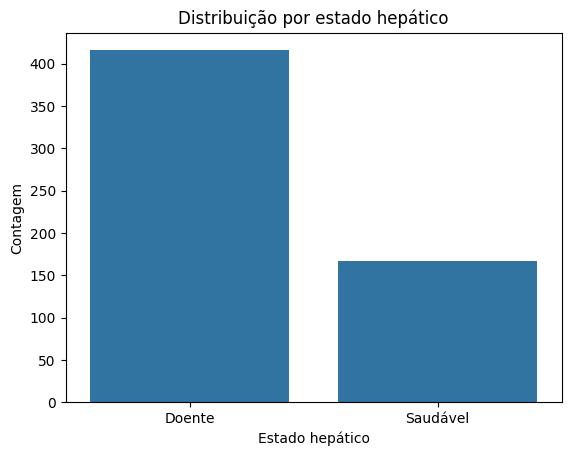

In [45]:
"""
Distribuição de pacientes quanto ao estado hepático
Utilizei o método map para facilitar o entendimento do gráfico uma vez que o atributo já está codificado numericamente.
"""
sns.countplot(x=bronze['Estado hepático'].map({1: 'Doente', 2: 'Saudável'}))
plt.title('Distribuição por estado hepático')
plt.xlabel('Estado hepático')
plt.ylabel('Contagem')
plt.show()


O gráfico mostra a distribuição dos pacientes de acordo com o seu estado hepático. Observa-se que a maior parte dos registros corresponde a pacientes com doença hepática, totalizando aproximadamente 420 casos, enquanto cerca de 165 pacientes estão classificados como saudáveis. Essa diferença aponta um **desequilíbrio na variável alvo**, o que pode impactar negativamente o desempenho de modelos preditivos. Esse tipo de desequilíbrio justifica a necessidade de técnicas de balanceamento, como o SMOTE, a fim de garantir que o modelo seja capaz de aprender padrões representativos para ambas as classes.

## Estatísticas descritivas

In [46]:
# Estatísticas dos dados numéricos
bronze.describe()

,Idade,Bilirrubina Total (mg/dL),Bilirrubina Conjugada (mg/dL),Fosfatase Alcalina (UI/L),Alanina Aminotransferase (UI/L),Aspartato Aminotransferase (UI/L),Proteínas Totais (g/dL),Albumina (g/dL),Razão Albumina/Globulina (%),Estado hepático
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


A maioria das variáveis parece apresentar grande variabilidade apresentando o  coeficiente de variação bem acima de 1, como **Fosfatase Alcalina**, **Alanina Aminotransferase** e **Aspartato Aminotransferase**.

Há valores máximos extremamente distantes da média em várias colunas como por exemplo, **Aspartato Aminotransferase** vai até 4.929 contra uma média de  aproximadamente 110, o que indica a presença de outliers.

Algumas variáveis têm uma distribuição assimétrica, pois a mediana é bem menor que a média, como em **Bilirrubina Total** e **Bilirrubina Conjugada**, sugerindo que poucos casos com níveis muito altos estão puxando a média para cima.



##Histogramas
Os histogramas mstram a distribuição das variáveis numéricas presentes no dataset. Observa-se que algumas variáveis, como **Idade**, **Albumina** e **Proteínas Totais**, apresentam uma distribuição aproximadamente simétrica ou levemente normal, o que pode favorecer alguns modelos estatísticos.

Por outro lado, variáveis como **Bilirrubina Total**, **Bilirrubina Conjugada**, **Fosfatase Alcalina**, **Alanina Aminotransferase (ALT)** e **Aspartato Aminotransferase (AST)** apresentam uma distribuição altamente assimétrica à direita, com presença de valores extremos (outliers). Isso pode impactar o desempenho de modelos sensíveis a escalas.

A variável Razão Albumina/Globulina (%) também apresenta leve assimetria. Isto posto, seria aadequado aplicar técnicas de padronização para reduzir o impacto de outliers e permitir melhor desempenho dos algoritmos de aprendizado de máquina.

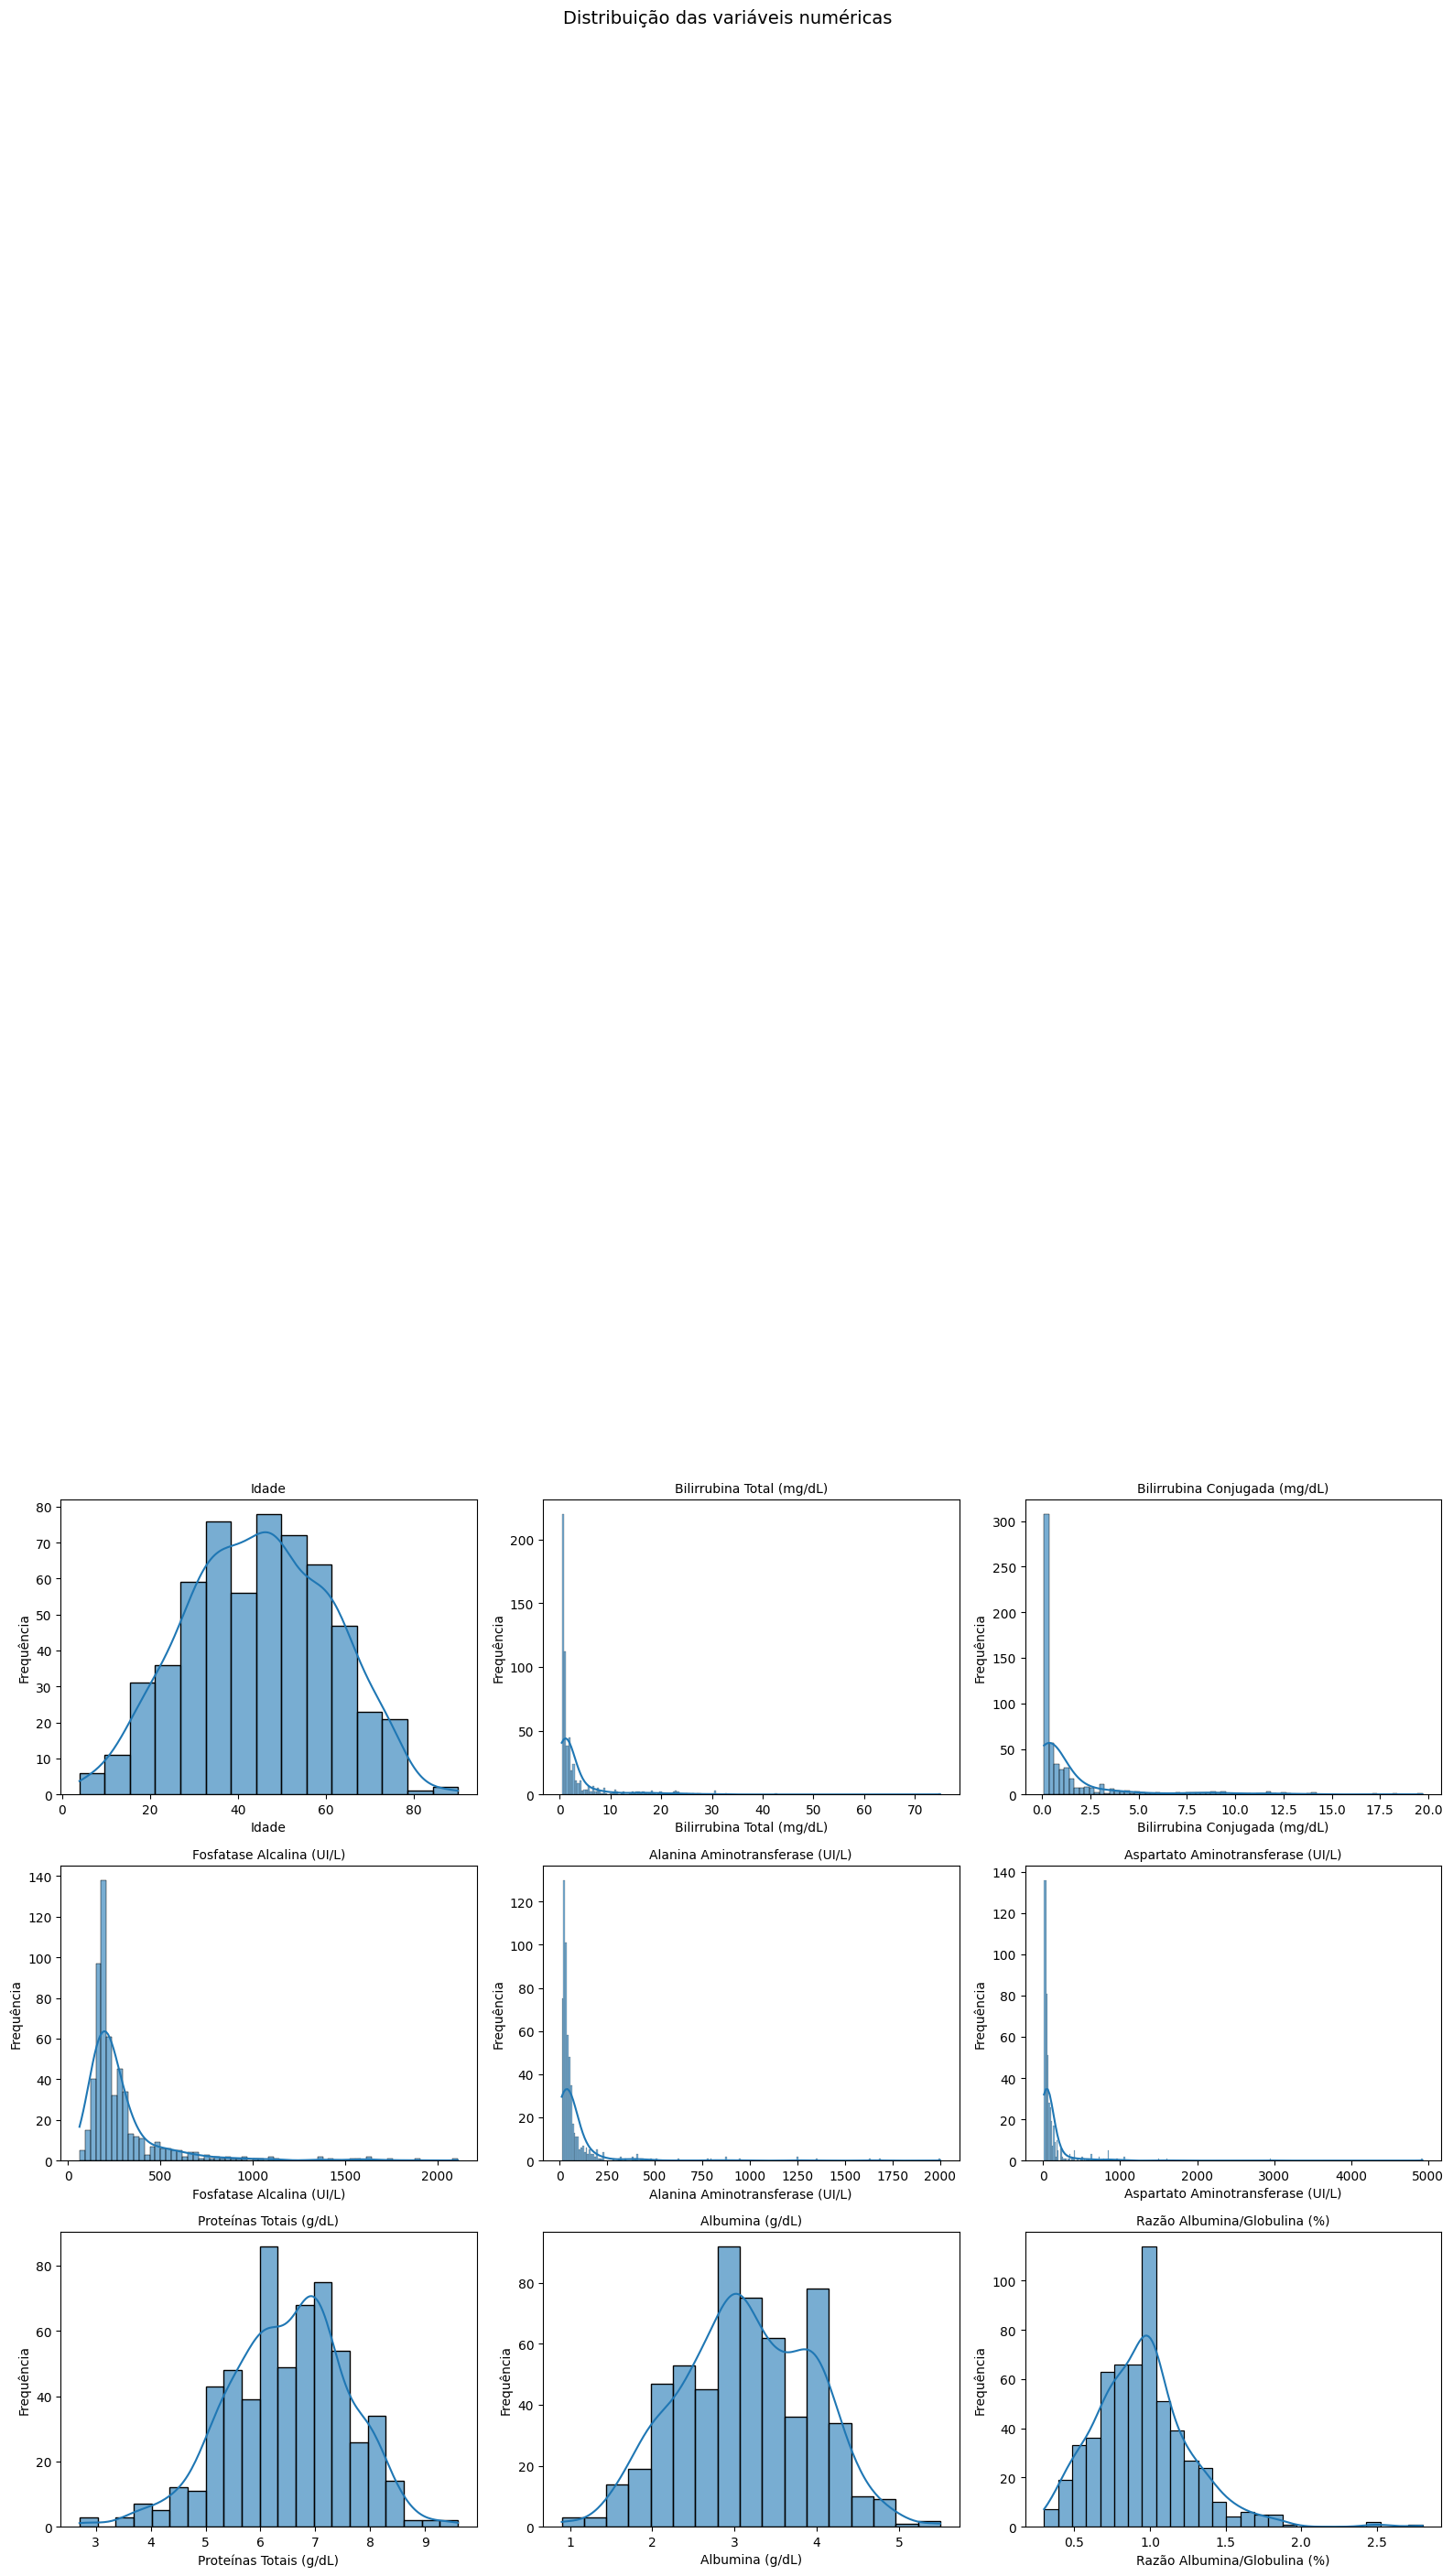

In [47]:
# Mapeando os valores numéricos para facilitar a leitura dos gráficos
bronze['Estado hepático'] = bronze['Estado hepático'].map({1: 'Doente', 2: 'Saudável'})

# Selecionando apenas colunas numéricas exceto Dataset
bronze_numbers = bronze.select_dtypes(include=['int64', 'float64'])

# Calcula o número de linhas da grade automaticamente
num_cols = len(bronze_numbers)
num_rows = math.ceil(num_cols / 3)

plt.figure(figsize=(16, 4 * num_rows))

for i, col in enumerate(bronze_numbers, 1):
    plt.subplot(num_rows, 3, i)
    sns.histplot(
        data=bronze,
        x=col,
        kde=True,
        alpha=0.6
    )
    plt.title(col, fontsize=10)
    plt.xlabel(col)
    plt.ylabel('Frequência')

plt.suptitle('Distribuição das variáveis numéricas', y=1.02, fontsize=14)
plt.tight_layout()
plt.show()

##Boxplot
Os boxplots apresentam as variáveis numéricas comparadas entre os grupos "Doente" e "Saudável", com base no estado hepático dos pacientes.

Observa-se que variáveis como **Bilirrubina Total**, **Bilirrubina Conjugada**, **Fosfatase Alcalina**, **Alanina Aminotransferase (ALT)** e **Aspartato Aminotransferase (AST)** apresentam valores medianos mais elevados no grupo de pacientes doentes, além de grande variabilidade e presença significativa de outliers, indicando potencial associação com a doença hepática.

Já variáveis como **Albumina**, **Proteínas Totais** e **Razão Albumina/Globulina (%)** tendem a apresentar valores ligeiramente mais altos no grupo saudável, o que pode indicar seu valor na diferenciação entre os estados clínicos.

A presença de distribuições assimétricas e valores extremos reforça a necessidade de utilização de técnicas de escalonamento e possíveis transformações. Além disso, esse comportamento pode indicar variáveis com poder discriminativo importantes para o modelo preditivo.

---

🚨 Optei por exibir os gráficos separando por estado hepático para entender se os outliers seriam decorrentes de doente hepática aguda ou não.

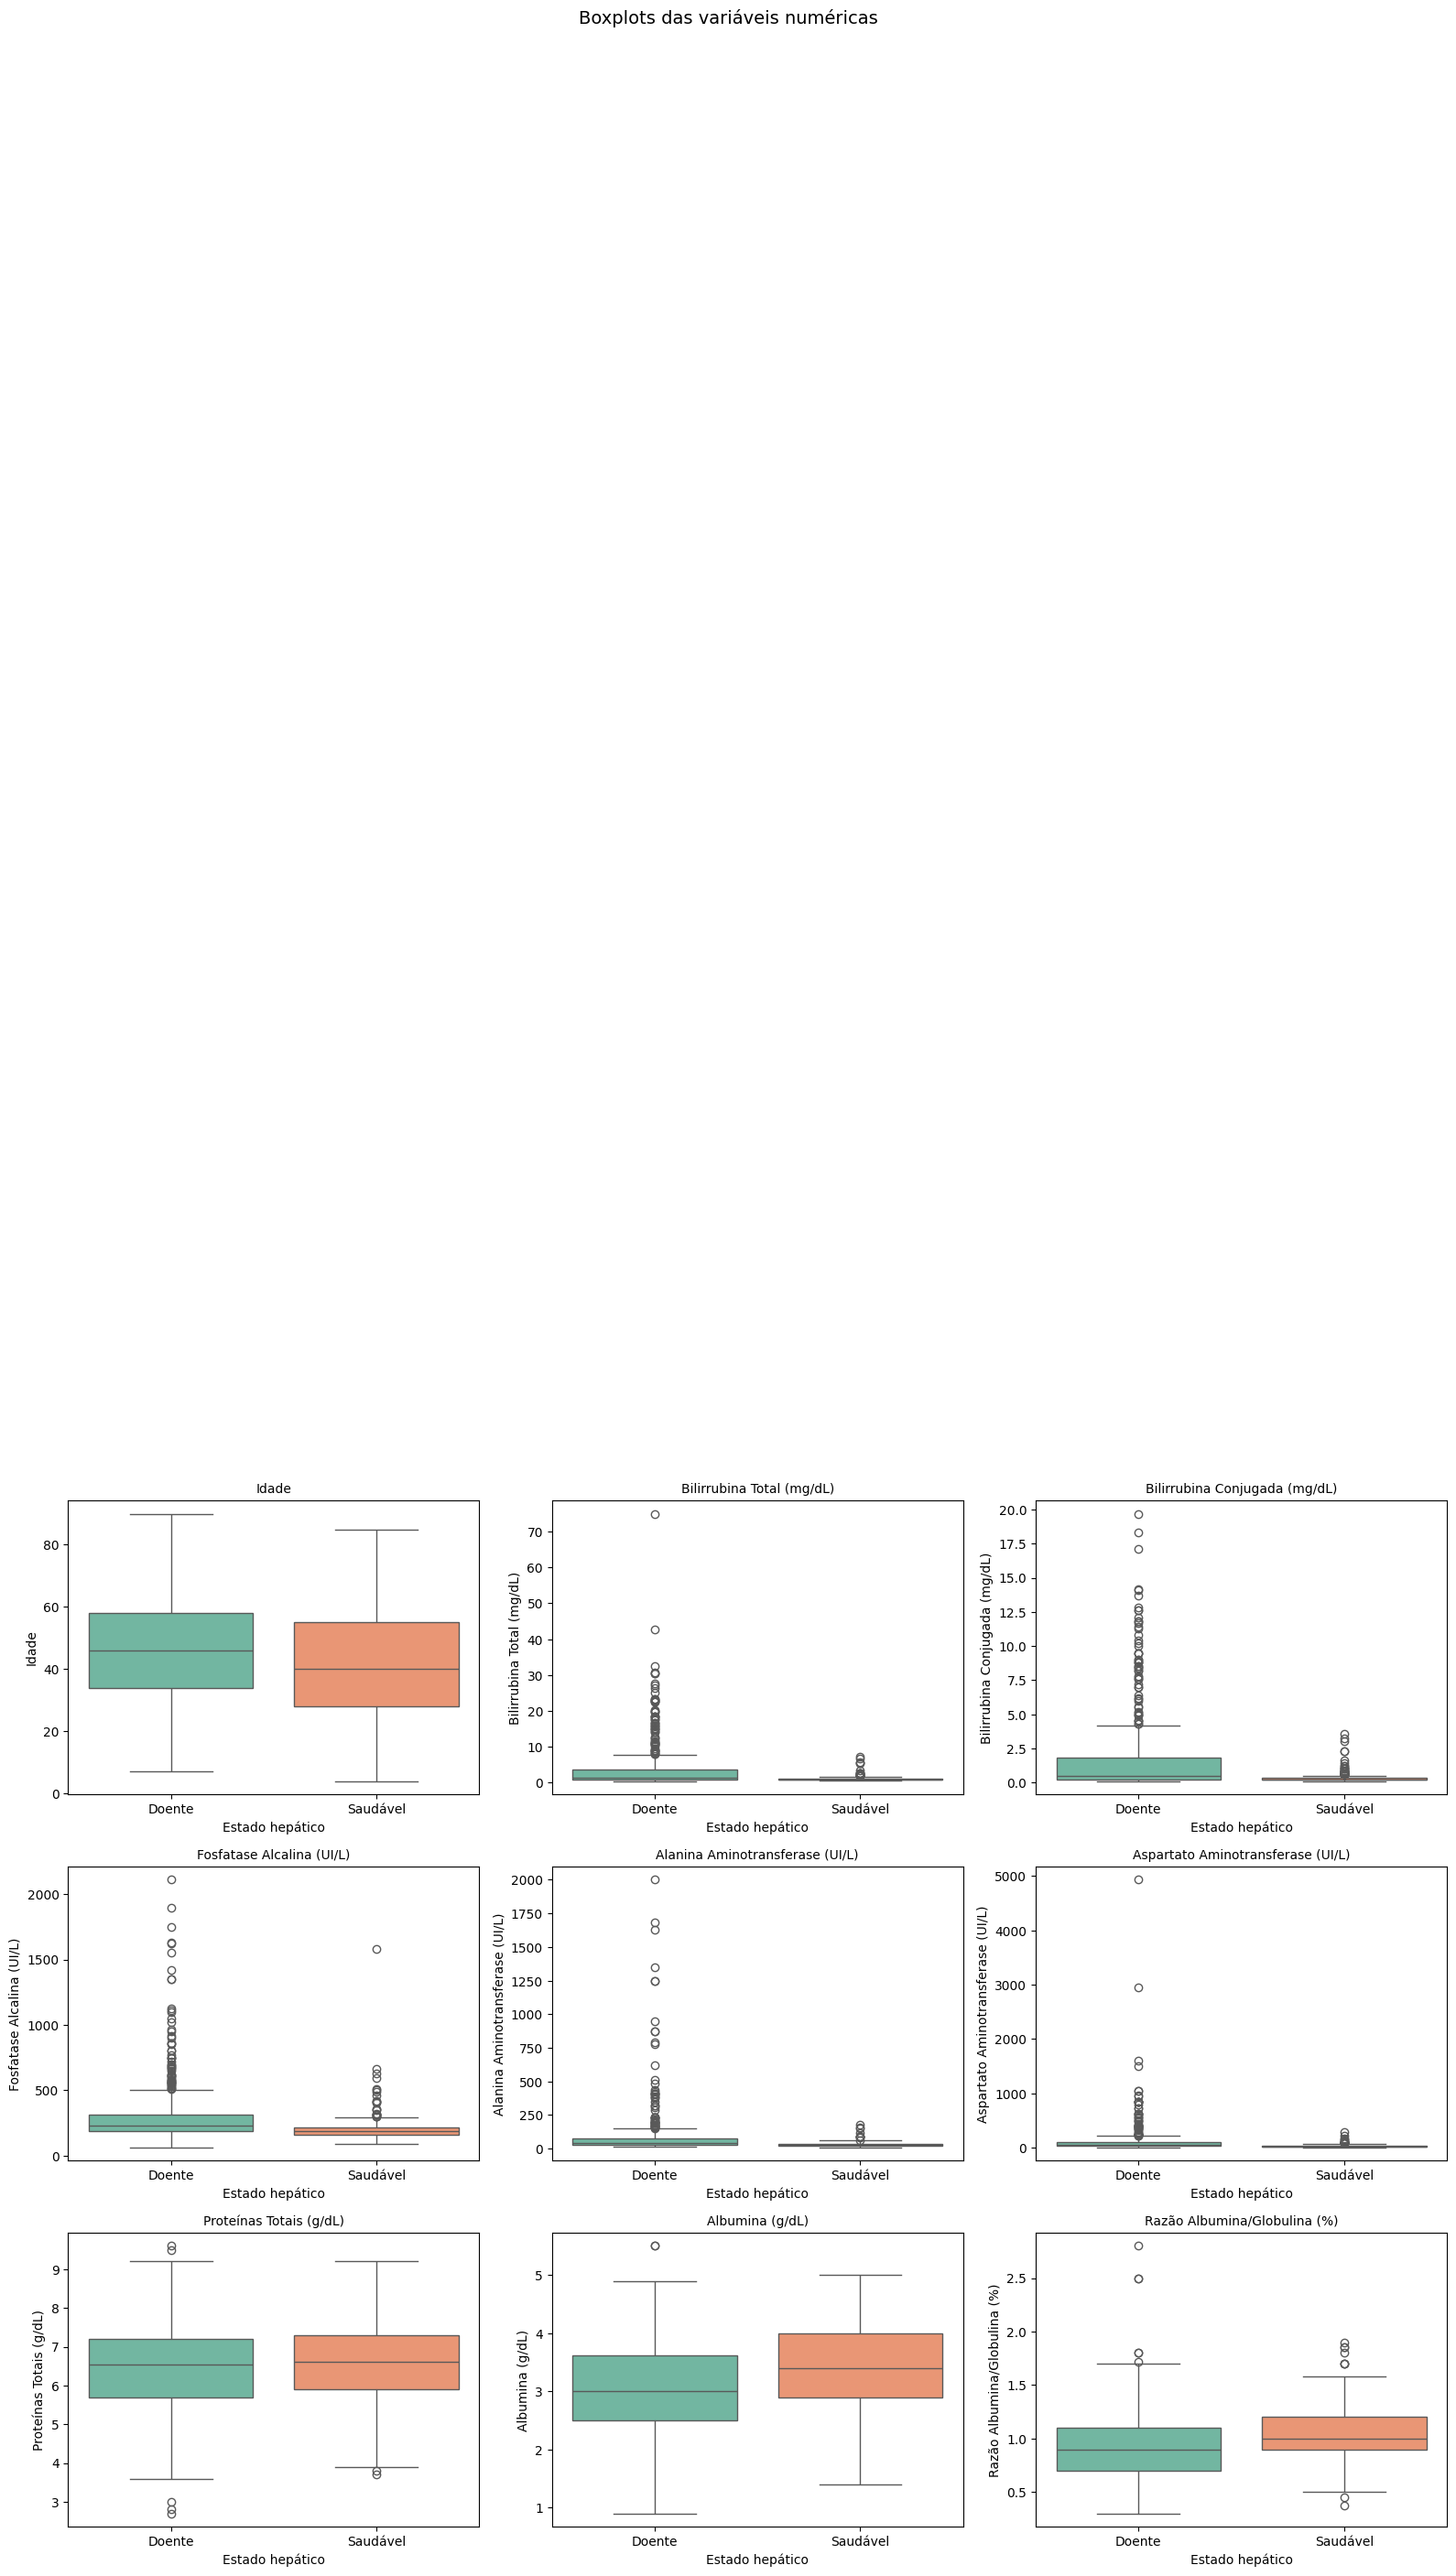

In [48]:
plt.figure(figsize=(16, 4 * num_rows))
for i, col in enumerate(bronze_numbers, 1):
    plt.subplot(num_rows, 3, i)
    sns.boxplot(
        data=bronze,
        x='Estado hepático',
        y=col,
        hue='Estado hepático', palette='Set2',
        legend=False)
    plt.title(col, fontsize=10)

plt.suptitle('Boxplots das variáveis numéricas', y=1.02, fontsize=14)
plt.tight_layout()
plt.show()


###Outliers

Como outliers em contextos médicos podem indicar apenas a ocorrência de casos graves, as variáveis que apresentam esses elementos que causam distorção serão tratados por outros meios.

## Correlação

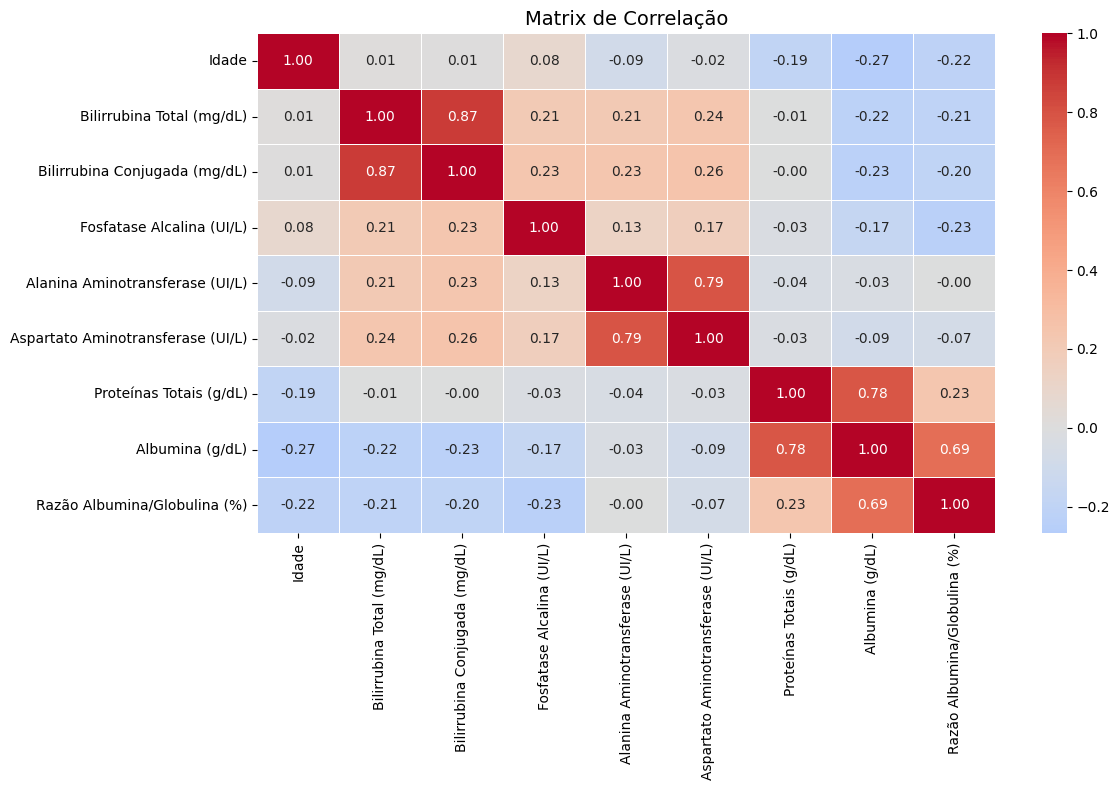

In [49]:
# Seleciona apenas colunas numéricas da camada bronze
bronze_numeric = bronze.select_dtypes(include=['int64', 'float64'])

# Calcula a matriz de correlação
correlation_matrix = bronze_numeric.corr()
plt.figure(figsize=(12, 8))
# Cria o mapa de calor com anotações
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0, linewidths=0.5)


# Título
plt.title('Matrix de Correlação', fontsize=14)
plt.tight_layout()
plt.show()


Observa-se forte correlação, em 4 pontos da matriz entre:
* Bilirrubina Total e Bilirrubina Conjugada, com *0.87*;
* Alanina Aminotransferase e Aspartato Aminotransferase, com *0.79*;
* Proteínas Totais e Albimuna, com *0.78*;
* Albumina e Razão Albumina/Globulina, com *0.69*.

Visto que o Proteínas Totais é composto por Albumina + Globulina, será importante tratar essa relação.
O mesmo se aplica a relação de Bilirrubina total e conjugada, sendo uma parte da composição da outra.

##Tratamento de Valores Nulos
Havia apenas 4 amostras com valores nulos para Razão Albumina/Globulina (%). Optei por removê-las do modelo.

In [50]:
# Remoção de possiveis dados duplicados e amostras sem dados para Albumin_and_Globulin_Ratio
bronze.drop_duplicates(inplace=True)
bronze.dropna(inplace=True)

#Pré-processamento

In [51]:
# Camada Silver – Dados limpos e pré-processados
silver = bronze
silver.head()

,Idade,Sexo,Bilirrubina Total (mg/dL),Bilirrubina Conjugada (mg/dL),Fosfatase Alcalina (UI/L),Alanina Aminotransferase (UI/L),Aspartato Aminotransferase (UI/L),Proteínas Totais (g/dL),Albumina (g/dL),Razão Albumina/Globulina (%),Estado hepático
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,Doente
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,Doente
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,Doente
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,Doente
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,Doente


###Feature Engineering

Foi necessária a adaptação de algumas variávies.

Devido à alta correlação observada entre as variáveis Albumina (g/dL) e Razão Albumina/Globulina (%), foi criada uma nova coluna denominada **Globulina** (g/dL), a partir da relação matemática entre essas variáveis, onde: Razão = Albumina / Globulina. A substituição da razão por essa nova variável visa reduzir a multicolinearidade e aumentar a eficiência dos modelos preditivos, proporcionando ao modelo uma variável adicional com significado clínico direto, o que pode favorecer a aprendizagem de padrões mais robustos na classificação do estado hepático dos pacientes.

Apesar da alta correlação entre as enzimas hepáticas **Alanina Aminotransferase (ALT)** e **Aspartato Aminotransferase (AST)**, ambas foram mantidas na análise inicial, pois podem carregar informações distintas relevantes para o modelo. Como alternativa, foi criada a **Razão AST/ALT**, com base em literatura médica, para melhor representar padrões clínicos associados a doenças hepáticas. Essa abordagem evita perdas de informação e reduz o risco de multicolinearidade.

Optou-se por manter a variável **Bilirrubina Conjugada** em vez da **Bilirrubina Total**, uma vez que a forma conjugada representa diretamente a capacidade funcional. Como o objetivo do modelo é identificar a presença de doença hepática, essa variável oferece maior especificidade clínica. A **Bilirrubina Total** foi descartada por conter componentes não diretamente relacionados à função hepática, o que poderia introduzir ruído no modelo.

In [52]:
# Criação do atributo Globulina a partir de Razão Albumina/Globulina (%)
silver['globulina'] = silver['Albumina (g/dL)']/silver['Razão Albumina/Globulina (%)']
# Criação do atributo Razão AST/ALT a partir
silver['Razão AST/ALT'] = silver['Aspartato Aminotransferase (UI/L)'] / silver['Alanina Aminotransferase (UI/L)']

### One-hot encoding
A codificação one-hot converte dados categóricos em um formato binário em que cada categoria é representada por uma coluna separada com um 1 indicando sua presença e 0s para todas as outras categorias. Ao utilizar os parametros *drop='first', sparse_output=False* resta apenas uma coluna, otimizando a execução.

In [53]:
# Ajustar e transformar as colunas Sexo e Estado hepático
encoder = OneHotEncoder(drop='first', sparse_output=False)

encoded = encoder.fit_transform(silver[['Sexo']])
silver['Sexo_encoded'] = encoded.astype(int)

encoded = encoder.fit_transform(silver[['Estado hepático']])
silver['Estado_encoded'] = encoded.astype(int)


In [54]:
silver = silver.drop(columns=['Razão Albumina/Globulina (%)','Sexo','Proteínas Totais (g/dL)','Bilirrubina Total (mg/dL)','Alanina Aminotransferase (UI/L)','Aspartato Aminotransferase (UI/L)','Estado hepático'])

In [55]:
silver.head()

,Idade,Bilirrubina Conjugada (mg/dL),Fosfatase Alcalina (UI/L),Albumina (g/dL),globulina,Razão AST/ALT,Sexo_encoded,Estado_encoded
0,65,0.1,187,3.3,3.666667,1.125000,0,0
1,62,5.5,699,3.2,4.324324,1.562500,1,0
2,62,4.1,490,3.3,3.707865,1.133333,1,0
3,58,0.4,182,3.4,3.400000,1.428571,1,0
4,72,2.0,195,2.4,6.000000,2.185185,1,0


### Dicionário de Dados Finais

| Nome da Coluna                      | Descrição                                                  | Tipo     | Unidade/Observações                                   |
| ----------------------------------- | ---------------------------------------------------------- | -------- | ----------------------------------------------------- |
| `Idade`                             | Idade do paciente                                          | Numérica | Anos                                                  |
| `Sexo_encoded`                      | Sexo do paciente codificado                                | Numérica | 0 = Feminino, 1 = Masculino                           |
| `Bilirrubina Conjugada (mg/dL)`     | Bilirrubina conjugada (direta) no sangue                   | Numérica | mg/dL                                                 |
| `Fosfatase Alcalina (UI/L)`         | Nível de fosfatase alcalina                                | Numérica | UI/L (Unidades Internacionais por Litro)              |
| `Albumina (g/dL)`                   | Nível de albumina no sangue                                | Numérica | g/dL                                                  |
| `globulina`                         | Valor calculado da globulina (proteínas totais - albumina) | Numérica | g/dL                                                  |
| `Razão AST/ALT`                     | Razão entre AST e ALT (AST/ALT)                            | Numérica | Percentual (%)                                                     |
| `Estado_encoded`                    | Variável-alvo: estado hepático codificado                  | Numérica | 0 = Saudável, 1 = Doente (aprendizado supervisionado) |


In [56]:
X = silver.drop('Estado_encoded', axis=1)
y = silver['Estado_encoded']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

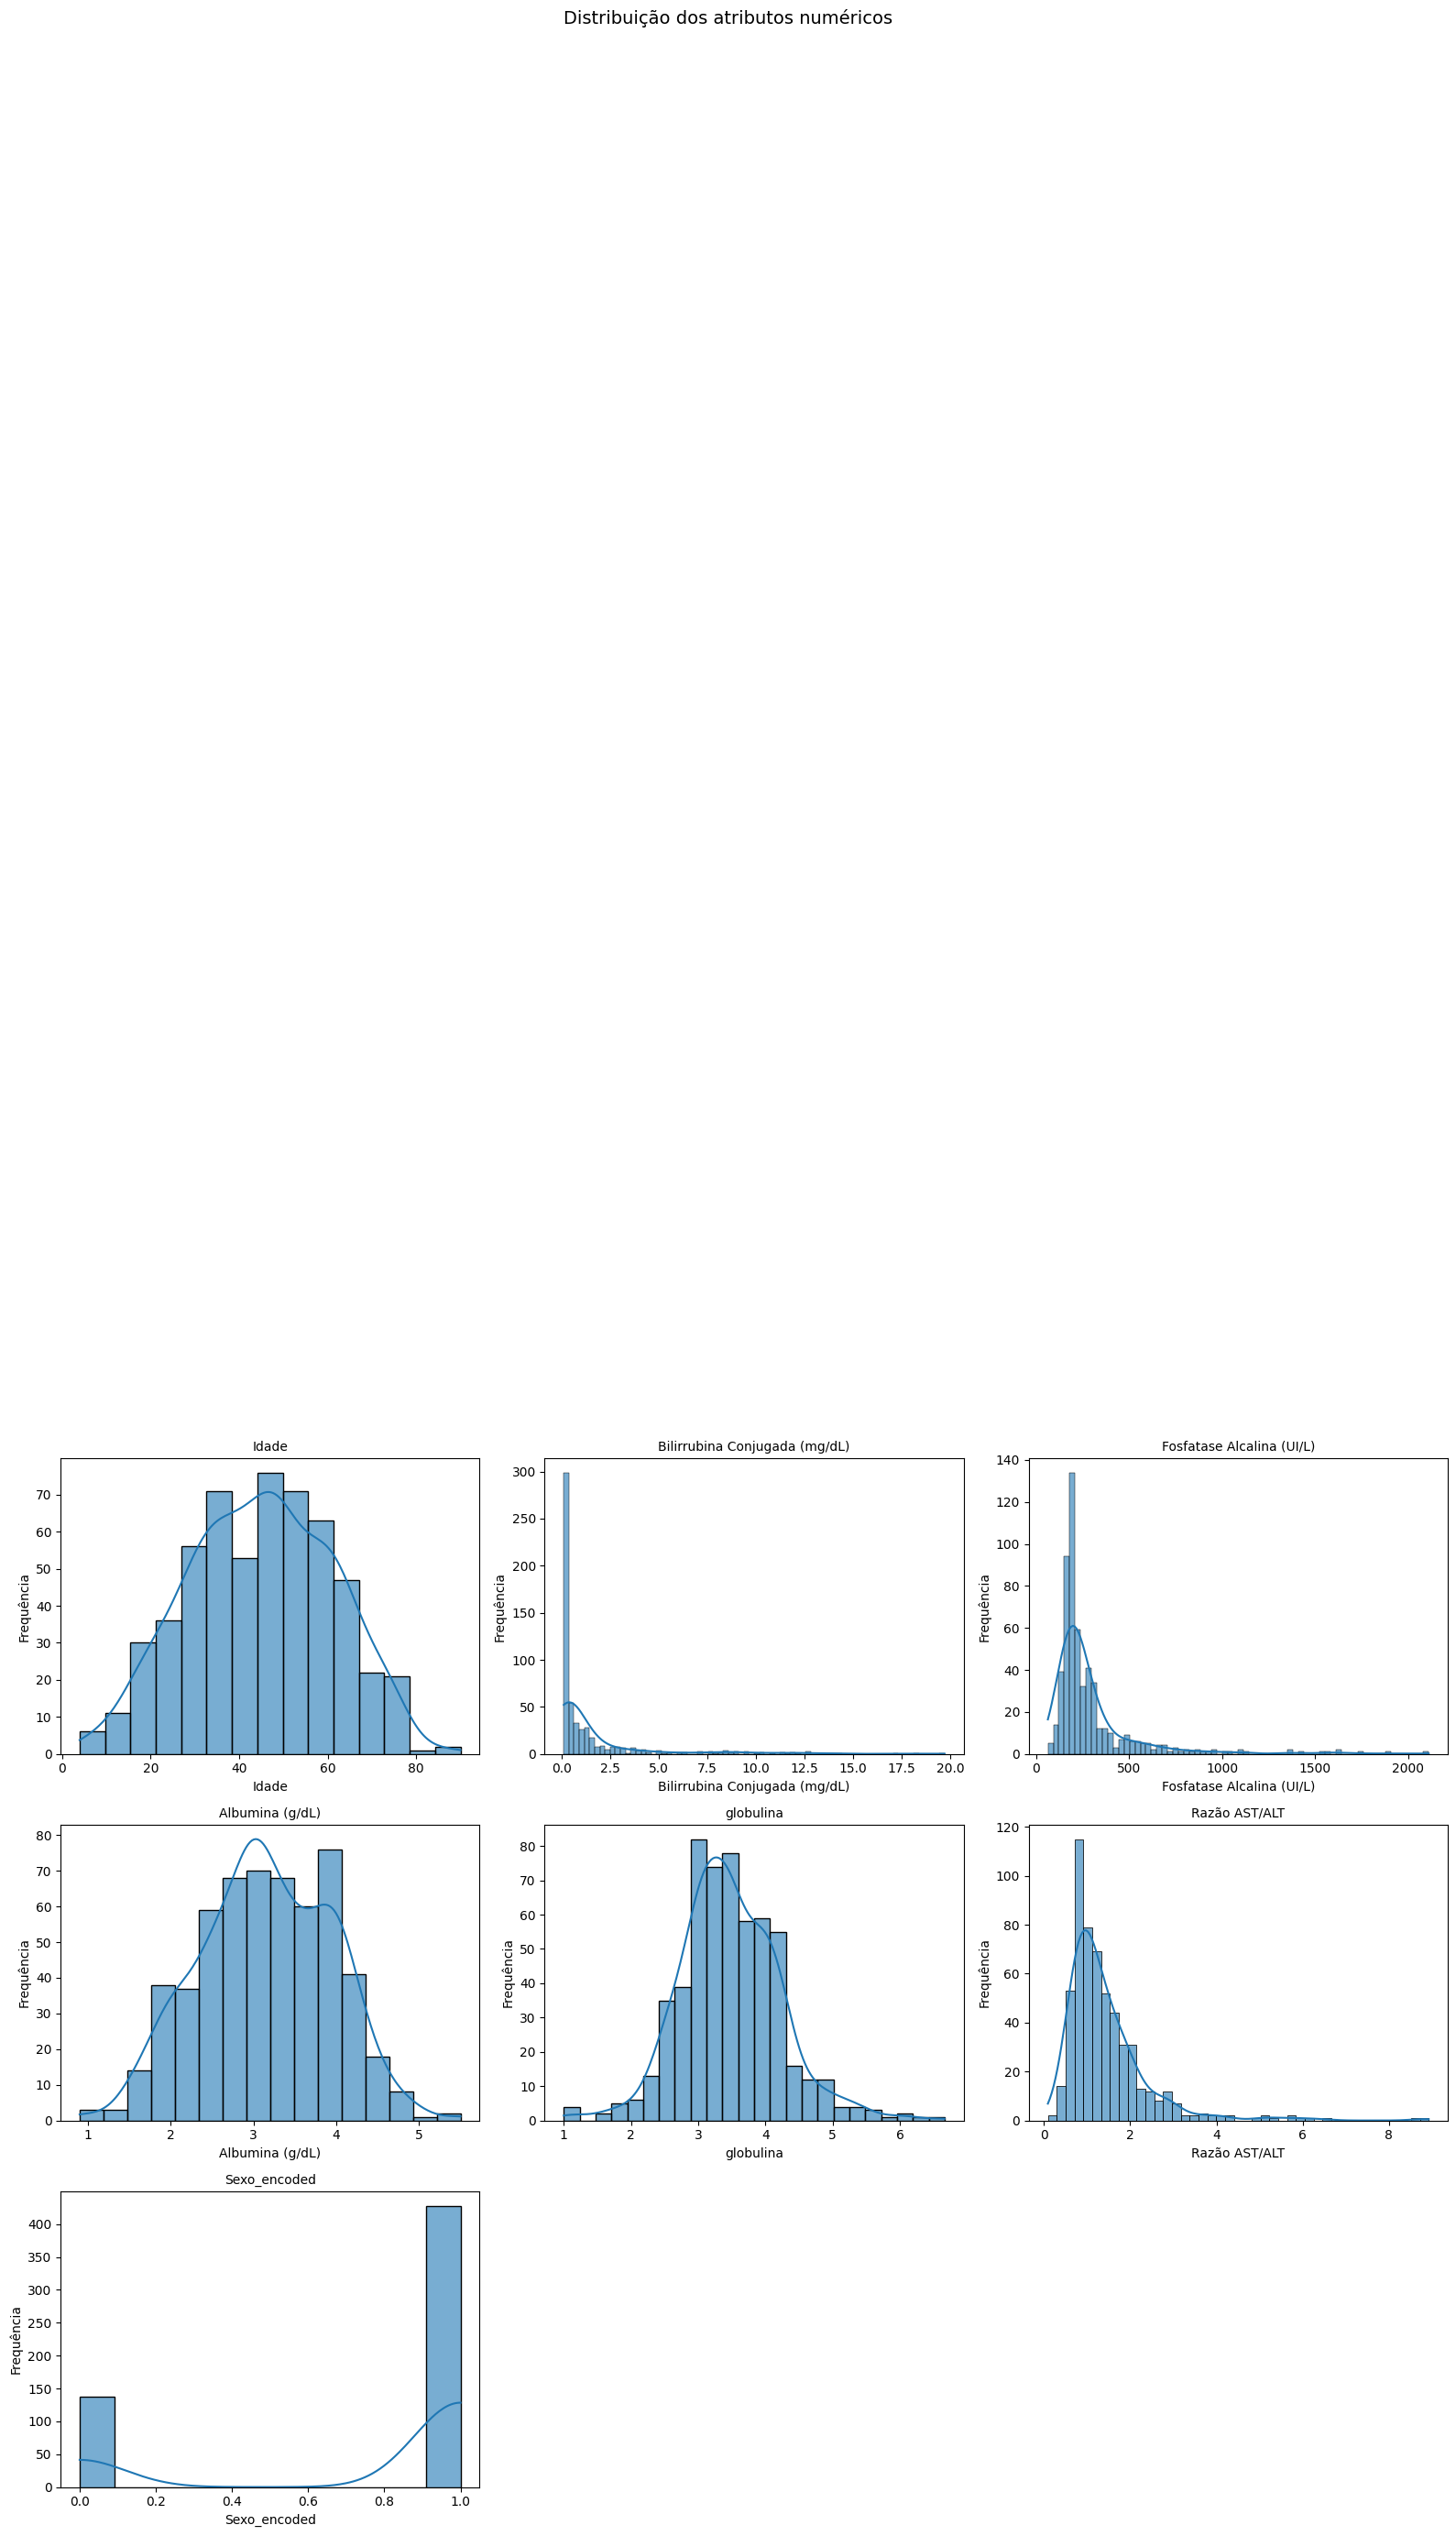

In [58]:
num_cols = len(X)
num_rows = math.ceil(num_cols / 3)

plt.figure(figsize=(16, 4 * num_rows))

for i, col in enumerate(X, 1):
    plt.subplot(num_rows, 3, i)
    sns.histplot(
        data=X,
        x=col,
        kde=True,
        alpha=0.6
    )
    plt.title(col, fontsize=10)
    plt.xlabel(col)
    plt.ylabel('Frequência')

plt.suptitle('Distribuição dos atributos numéricos', y=1.02, fontsize=14)
plt.tight_layout()
plt.show()

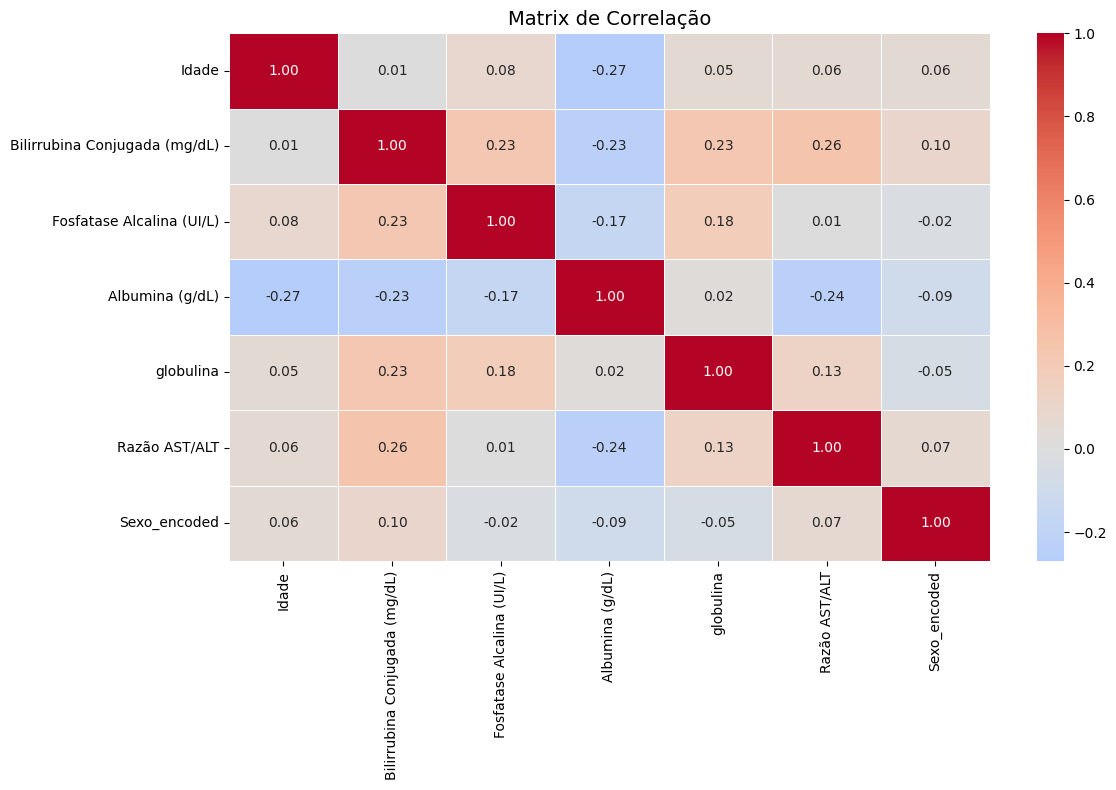

In [59]:
# Calcula a matriz de correlação
correlation_matrix = X.corr()
plt.figure(figsize=(12, 8))
# Cria o mapa de calor com anotações
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0, linewidths=0.5)


# Título
plt.title('Matrix de Correlação', fontsize=14)
plt.tight_layout()
plt.show()

Após as adequações realizadas, a matriz de correlação apresenta valores muito mais favoráveis aos modelos de análise preditiva.

### Normalização/Escalonamento
Como o dataset apresenta variáveis com ampla variação de escala e presença de outliers — como visto nos boxplots e na análise estatística —, optei por utilizar o RobustScaler para a padronização dos dados numéricos.

Diferente do StandardScaler (que utiliza média e desvio padrão), o RobustScaler utiliza a mediana e o intervalo interquartil (IQR), sendo mais resistente à influência de valores extremos. Esse comportamento é muito útil em dados médicos, onde outliers podem representar condições clínicas reais e de grande importância.

Essa padronização garante que o modelo interprete corretamente as variáveis com diferentes escalas, sem que outliers distorçam o treinamento.

In [60]:
assim_metricas = [
    'Bilirrubina Conjugada (mg/dL)',
    'Fosfatase Alcalina (UI/L)',
    'Razão AST/ALT']

# Inicializa o scaler
scaler = RobustScaler()

# Aplica o RobustScaler apenas nas colunas selecionadas
X_train[assim_metricas] = scaler.fit_transform(X_train[assim_metricas])
X_test[assim_metricas] = scaler.transform(X_test[assim_metricas])

### Balanceamento com SMOTE

Como há um desbalanceamento entre os estados hepáticos (existem mais indivíduos doentes do que saudáveis) foi aplicado o **oversampling** com **SMOTE** para ajustar o desbalanceamento e melhorar a capacidade do modelo de identificar corretamente ambas as classes, especialmente a minoritária. Isso torna o sistema preditivo mais justo, sensível e útil na prática clínica.

In [61]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [62]:
print(f"Dimensões de X_train_res: {X_train_res.shape}")
print(f"Dimensões de X_test: {X_test.shape}")
print(f"Dimensões de y_train_res: {y_train_res.shape}")
print(f"Dimensões de y_test: {y_test.shape}")

Dimensões de X_train_res: (566, 7)
Dimensões de X_test: (170, 7)
Dimensões de y_train_res: (566,)
Dimensões de y_test: (170,)


# Conclusão

---

Este trabalho teve como objetivo preparar um conjunto de dados clínicos sobre doenças hepáticas, por meio de análise exploratória e pré-processamento, para posterior uso em modelos preditivos. Entre as hipóteses levantadas, considerou-se que pacientes mais velhos teriam maior risco de desenvolver doenças hepáticas, e que marcadores sanguíneos específicos apresentariam comportamentos distintos entre os grupos saudável e doente.

A análise não confirmou algumas dessas relações, como a tendência de maior idade em pacientes doentes, além de correlações relevantes entre variáveis bioquímicas (como ALT e AST, Albumina e Globulina). Com base nesses achados, foram realizadas transformações nos dados, como a criação de atributos derivados, exclusão de colunas altamente correlacionadas e aplicação do RobustScaler para lidar com a presença de outliers.

O desbalanceamento de classes também foi tratado com o uso de SMOTE, preparando a base para a construção de modelos supervisionados mais robustos e confiáveis.

####Pacientes com níveis elevados de bilirrubina e enzimas hepáticas (AST, ALT) têm maior probabilidade de apresentar doença hepática?

---


De acordo com a visualização dos gráficos de dispersão, há uma relação clara entre níveis mais elevados de bilirrubina (conjugada) e as enzimas hepáticas (AST e ALT) e a probabilidade do paciente estar doente. Há maior concentração de pontos "Doente" quando tanto a Bilirrubina Conjugada quanto as enzimas estão elevadas — especialmente o grupo com valores mais extremos de bilirrubina e enzimas hepáticas. Enquanto pacientes saudáveis estão concentrados na parte inferior esquerda do gráfico.


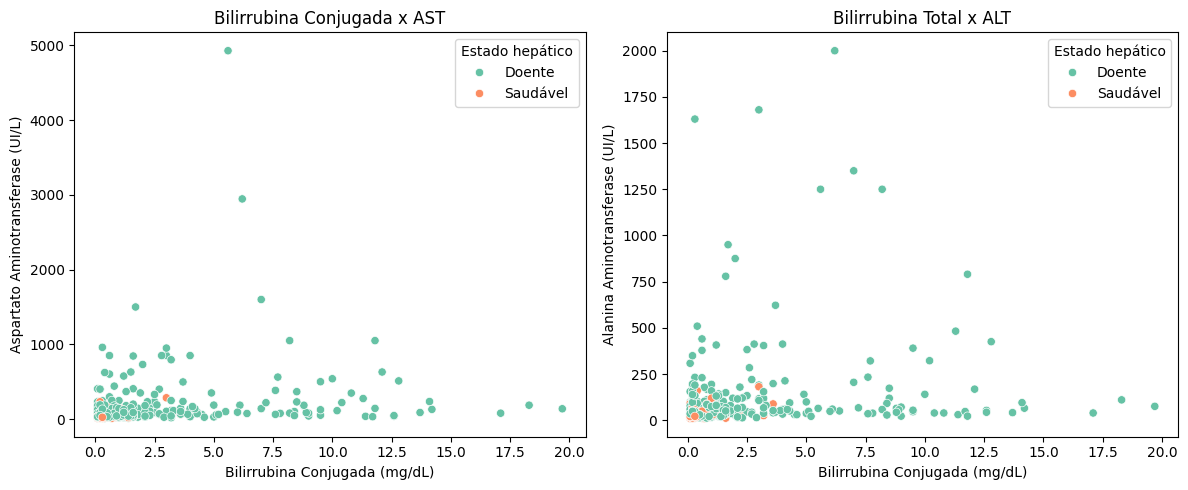

In [63]:
plt.figure(figsize=(12, 5))

# Total Bilirubin vs AST
plt.subplot(1, 2, 1)
sns.scatterplot(
    data=bronze,
    x='Bilirrubina Conjugada (mg/dL)', y='Aspartato Aminotransferase (UI/L)',
    hue='Estado hepático', palette='Set2'
)
plt.title('Bilirrubina Conjugada x AST')

# Total Bilirubin vs ALT
plt.subplot(1, 2, 2)
sns.scatterplot(
    data=bronze,
    x='Bilirrubina Conjugada (mg/dL)', y='Alanina Aminotransferase (UI/L)',
    hue='Estado hepático', palette='Set2'
)
plt.title('Bilirrubina Total x ALT')

plt.tight_layout()
plt.show()

#### Existe relação entre o nível de albumina e a presença da doença hepática?

---
Há evidência visual de associação negativa entre o nível de albumina e a presença de doença hepática. Porém, a sobreposição das distribuições indica que nem todos os doentes têm baixa albumina, e nem todos os saudáveis têm alta albumina. Logo, a relação é relevante, mas moderada. A albumina pode contribuir para o diagnóstico, mas não é suficiente sozinha.



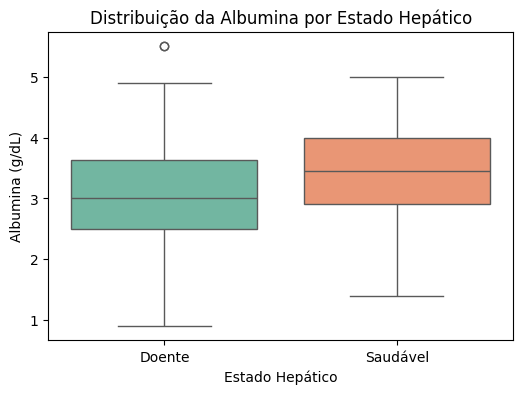

In [64]:
plt.figure(figsize=(6,4))
sns.boxplot(
    data=bronze,
    x='Estado hepático',
    y='Albumina (g/dL)',
    hue='Estado hepático',
    palette='Set2',
    legend=False
)
plt.title('Distribuição da Albumina por Estado Hepático')
plt.ylabel('Albumina (g/dL)')
plt.xlabel('Estado Hepático')
plt.show()

####Pacientes mais velhos tendem a apresentar um risco maior para o desenvolvimento de doença hepática?

---
A diferença entre os grupos de pacientes doentes e saudáveis não é suficientemente expressiva para confirmar a hipótese de que pacientes mais velhos têm maior propensão à doença hepática.


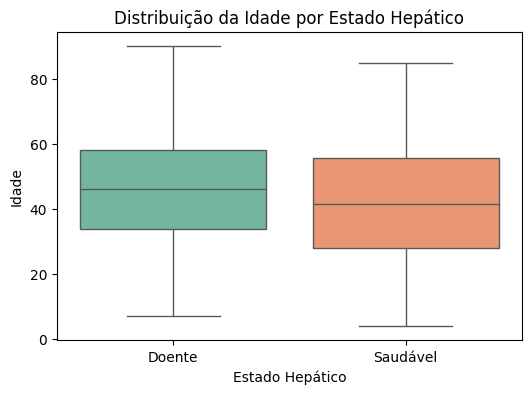

In [65]:
plt.figure(figsize=(6,4))
sns.boxplot(
    data=bronze,
    x='Estado hepático',
    y='Idade',
    hue='Estado hepático',
    palette='Set2',
    legend=False
)
plt.title('Distribuição da Idade por Estado Hepático')
plt.ylabel('Idade')
plt.xlabel('Estado Hepático')
plt.show()

#### Medidas como a proporção entre albumina e globulina são bons indicadores para diferenciar pacientes saudáveis de doentes?

---
Com base no gráfico violino, a **Razão Albumina/Globulina** mostra diferenças visíveis entre pacientes saudáveis e doentes, sugerindo que pode ser um bom indicador complementar, mas não é um marcador isoladamente determinante. Nota-se que a razão acima de 2.5 só está presente em pacientes doentes.


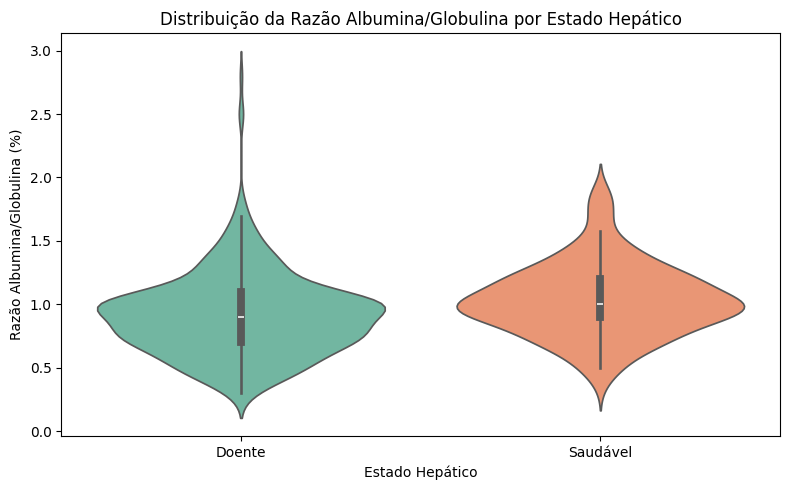

In [66]:
plt.figure(figsize=(8, 5))
sns.violinplot(
    data=bronze,
    x='Estado hepático',
    y='Razão Albumina/Globulina (%)',
    hue='Estado hepático',
    palette='Set2'
)

plt.title('Distribuição da Razão Albumina/Globulina por Estado Hepático')
plt.xlabel('Estado Hepático')
plt.ylabel('Razão Albumina/Globulina (%)')
plt.tight_layout()
plt.show()